In [7]:
using Distributions
using StatsPlots

In [4]:
per_batch = 15
per_boxplot = 100 * per_batch

seconds = 4 * per_boxplot
days = floor(seconds / (60 * 60 * 24))
seconds -= (60 * 60 * 24) * days

hours = floor(seconds / (60 * 60))
seconds -= 60 * 60 * hours

mins = floor(seconds / 60)
seconds -= 60 * mins

println("$days days, $hours hours, $mins mins, $seconds seconds")

0.0 days, 1.0 hours, 40.0 mins, 0.0 seconds


- overview/explain two-sample t-test
- derive t test confidence interval by inverting the t test of H0: delta = delta0 vs. H_A: delta != delta0, where delta = mu_1 - mu_2, delta0 in R
    - CI is the set of all deltas for which we do NOT reject the null == set of all deltas for which p-value > 0.05
    - set of all deltas for which the test statistic < t quantile == set of all deltas for which [mean(x1) - mean(x2) - delta] / s.d. (pooled or unpooled) < t quantile
    - output after solving for delta is the CI
- mention that the test statistic for difference in means (for pooled variances) follows a t distribution
    - DoF also changes for unpooled variances
- permutation test
    - explain how permTest p-value is derived (detail interval halving, etc.)
    - similar to above t test overview, start with two-sided alternative, then explain for inverting two one-sided tests (here, use alpha/2 instead of alpha)
    - literature review
- fix DoF in unpooled tconf()

equal sample sizes (try 10, 20, 30)
monte carlo for larger samples (200k MC simulations)


In [5]:
marginError = 2 * sqrt((0.05 * 0.95) / 200_000)

0.0009746794344808964

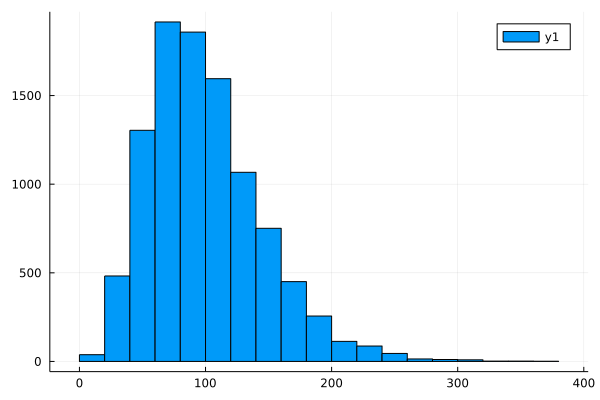

In [56]:
histogram(rand(Gamma(5, 20), 10000), bins=20)

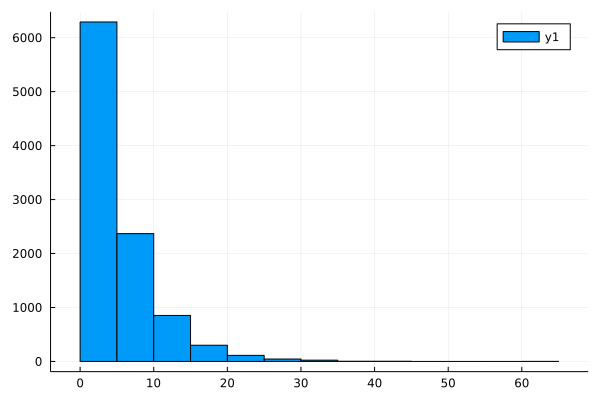

In [61]:
histogram(rand(Exponential(5), 10000), bins=20)

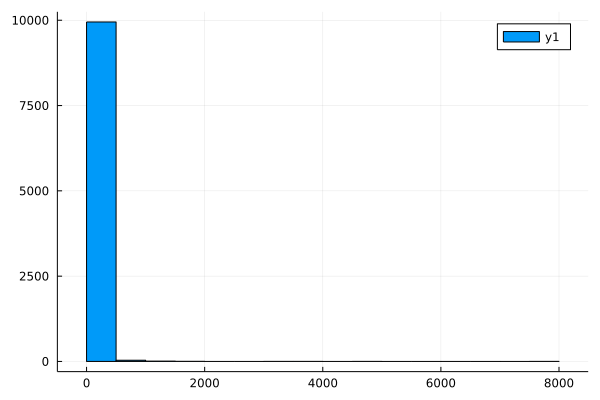

In [67]:
mu = 1
histogram(rand(LogNormal(mu, 2*mu), 10000), bins=20)

delta0 = mean(x1) - mean(y1) = -153.68926040698383
  0.001383 seconds (56 allocations: 4.518 MiB)


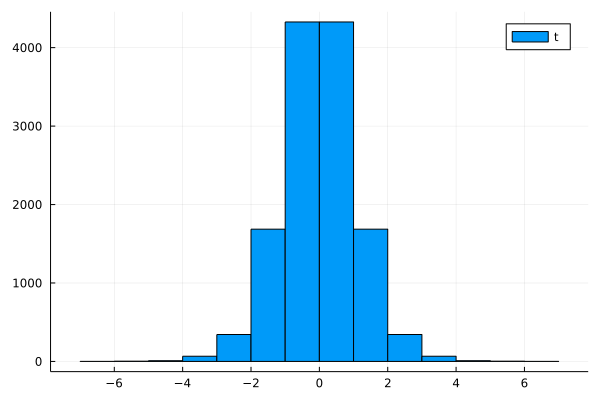

In [48]:
Random.seed!(123)
nx, ny = 8, 8
px, py = partition(nx, ny)

x1 = rand(Gamma(2, 100), nx)
y1 = rand(Gamma(3, 150), ny)

@show delta0 = mean(x1) - mean(y1)

@time begin
ts = testStatDistr(x1 .- delta0, y1, pooled)
end

plt = histogram(ts, bins=20, label="t")
savefig(plt,"sampling_distribution.png")
plt

delta = mean(x2) - mean(y2) = -96.76567644208995


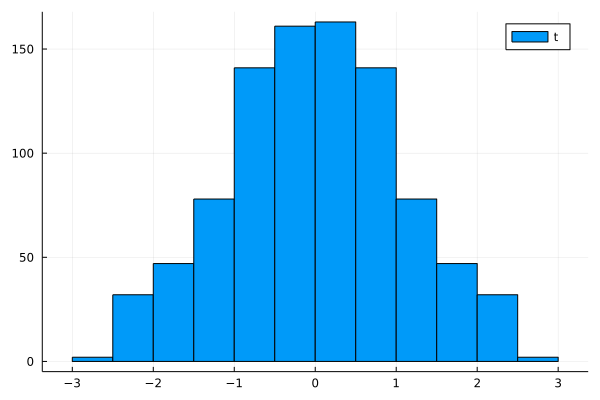

In [14]:
Random.seed!(123)
x2 = rand(Normal(2, 3), nx)
y2 = rand(Gamma(7, 15), ny)
delta_true = 2 - (7*15)
@show delta = mean(x2) - mean(y2)
ts = testStatDistr(x2 .- delta, y2, pooled)
plt = histogram(ts, bins=20, label="t")
savefig(plt,"../results/examples/sampling_distribution2.png")
plt

In [34]:
wide   = tconf(x1, y1, alpha=0.00001, pooled=pooled)
narrow = tconf(x1, y1, alpha=0.4, pooled=pooled)

# invert two one-sided tests
alt_lo, alt_hi = "greater", "less"
singleTwoSided = permInterval(x1, y1, wide[1], narrow[1], delta_true; pooled=pooled, alpha=0.025)
@show singleTwoSided

# invert single two-sided test
alt_lo = alt_hi = "two_sided"
twoOneSided = permInterval(x1, y1, wide[1], narrow[1], delta_true; pooled=pooled, alpha=0.05)
@show twoOneSided

singleTwoSided = (-78.990364f0, -53.703583f0)
twoOneSided = (-78.990364f0, -53.132923f0)


(-78.990364f0, -53.132923f0)

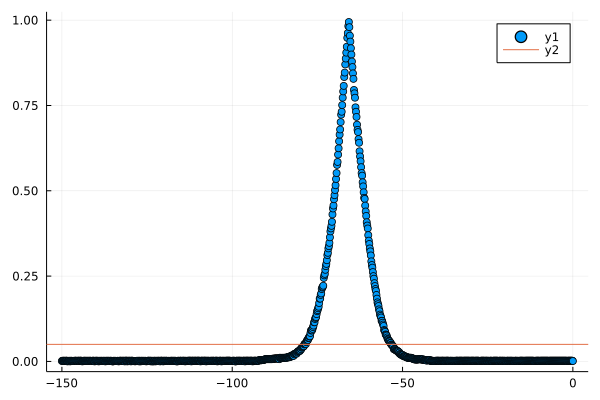

In [41]:
deltas = LinRange(-150, 0, 1000)
p = [pval(x1, y1, pooled, "two_sided", delta) for delta in deltas]
plt = scatter(deltas, p)
hline!([0.05])
savefig(plt,"delta_p_twoSided.png")
plt

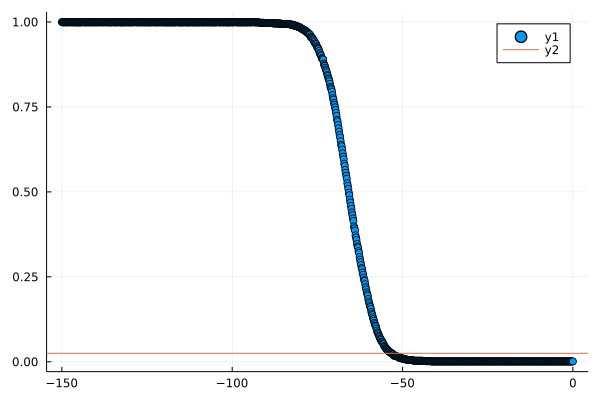

In [39]:
deltas = LinRange(-150, 0, 1000)
p = [pval(x1, y1, pooled, "less", delta) for delta in deltas]
plt = scatter(deltas, p)
hline!([0.025])
savefig(plt,"delta_p_less.png")
plt

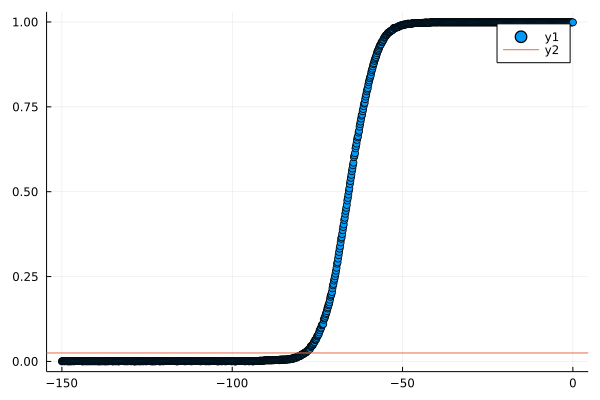

In [40]:
deltas = LinRange(-150, 0, 1000)
p = [pval(x1, y1, pooled, "greater", delta) for delta in deltas]
plt = scatter(deltas, p)
hline!([0.025])
savefig(plt,"delta_p_greater.png")
plt